# 0. Import Packages

In [1]:
import test
import matplotlib.pyplot as plt
import numpy as np
from decision_tree import decision_tree_learning

# 1. Examine Data

The first 7 columns represent the wifi signal strengths of several routers. The last column gives the truth label (room number). __Aim: given the wifi strengths, identify the room number__.

Observation: it looks like the data are unshuffled, so we must take care when creating train/test/validation datasets.

In [2]:
with open("wifi_db/clean_dataset.txt", "r") as clean_db:
    for each_line in clean_db.readlines()[:10]:
        print(each_line)

-64	-56	-61	-66	-71	-82	-81	1

-68	-57	-61	-65	-71	-85	-85	1

-63	-60	-60	-67	-76	-85	-84	1

-61	-60	-68	-62	-77	-90	-80	1

-63	-65	-60	-63	-77	-81	-87	1

-64	-55	-63	-66	-76	-88	-83	1

-65	-61	-65	-67	-69	-87	-84	1

-61	-63	-58	-66	-74	-87	-82	1

-65	-60	-59	-63	-76	-86	-82	1

-62	-60	-66	-68	-80	-86	-91	1



## 1.1. Get histograms of the data (understand distributions):

In [6]:
keys = ["router {}".format(i) for i in range(1,8)]
# MH: each router 1:7 is the key
data_dict = {i:{key:[] for key in keys} for i in range(1,5)}
#MH: dictionary of all the values for each key
with open("wifi_db/clean_dataset.txt", "r") as clean_db:
    for each_line in clean_db.readlines():
        arr = each_line.strip().split("\t")
        #MH strip removes spaces at beginning and end of string
        #MH split, turns from one string to multiple strings, each containing one element. \t puts a space between them for visibility
        arr = [int(x) for x in arr]
        #MH turns the strings into integers, puts in a list
        room = arr[-1]
        #MH selects the last column for the room/router
        """I think this is a mistake - room should be router"""
        for i, key in enumerate(keys):
            data_dict[room][key] += [arr[i]]
            #MH confused as to what this for loop is doing?

(array([ 20.,  58., 121., 167.,  80.,   1.,   9.,   7.,  19.,  18.]),
 array([-53. , -48.8, -44.6, -40.4, -36.2, -32. , -27.8, -23.6, -19.4,
        -15.2, -11. ]),
 <a list of 10 Patch objects>)

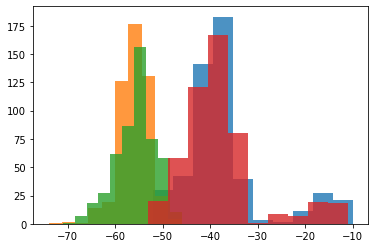

In [7]:
plt.hist(data_dict[2]["router 1"], alpha=0.8)
plt.hist(data_dict[2]["router 2"], alpha=0.8)
plt.hist(data_dict[2]["router 3"], alpha=0.8)
plt.hist(data_dict[2]["router 4"], alpha=0.8)
#MH confused: does data_dict[2] not call the router 1? 

(array([  2.,   3.,  21.,  55.,  65., 111., 152.,  72.,  18.,   1.]),
 array([-71. , -69.1, -67.2, -65.3, -63.4, -61.5, -59.6, -57.7, -55.8,
        -53.9, -52. ]),
 <a list of 10 Patch objects>)

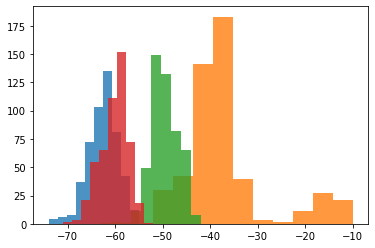

In [8]:
plt.hist(data_dict[1]["router 1"], alpha=0.8)
plt.hist(data_dict[2]["router 1"], alpha=0.8)
plt.hist(data_dict[3]["router 1"], alpha=0.8)
plt.hist(data_dict[4]["router 1"], alpha=0.8)
#MH confused: same again, i am confused as to what data_dict is calling

## 1.2. Get correlations between different routers

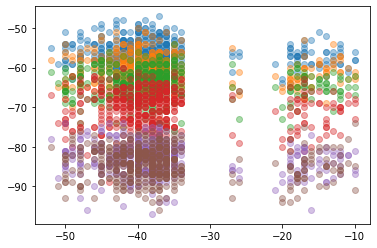

In [6]:
plt.scatter(data_dict[2]["router 1"], data_dict[1]["router 2"], alpha=0.4)
plt.scatter(data_dict[2]["router 1"], data_dict[1]["router 3"], alpha=0.4)
plt.scatter(data_dict[2]["router 1"], data_dict[1]["router 4"], alpha=0.4)
plt.scatter(data_dict[2]["router 1"], data_dict[1]["router 5"], alpha=0.4)
plt.scatter(data_dict[2]["router 1"], data_dict[1]["router 6"], alpha=0.4)
plt.scatter(data_dict[2]["router 1"], data_dict[1]["router 7"], alpha=0.4)

## 1.3. Get correlations between room number and router strength

In [7]:
router_dict = {key:[] for key in keys}
rooms_list = []
with open("wifi_db/clean_dataset.txt", "r") as clean_db:
    for each_line in clean_db.readlines():
        arr = each_line.strip().split("\t")
        arr = [int(x) for x in arr]
        room = arr[-1]
        for i, key in enumerate(keys):
            router_dict[key] += [arr[i]]
        rooms_list += [room]

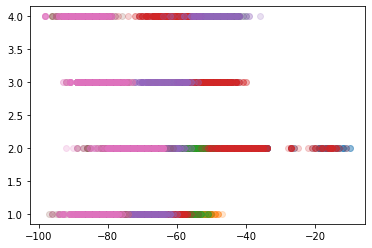

In [8]:
plt.scatter(router_dict["router 1"], rooms_list, alpha=0.2)
plt.scatter(router_dict["router 2"], rooms_list, alpha=0.2)
plt.scatter(router_dict["router 3"], rooms_list, alpha=0.2)
plt.scatter(router_dict["router 4"], rooms_list, alpha=0.2)
plt.scatter(router_dict["router 5"], rooms_list, alpha=0.2)
plt.scatter(router_dict["router 6"], rooms_list, alpha=0.2)
plt.scatter(router_dict["router 7"], rooms_list, alpha=0.2)

## 1.4. Create data matrix

In [9]:
data = []
with open("wifi_db/clean_dataset.txt", "r") as clean_db:
    for each_line in clean_db.readlines():
        arr = each_line.strip().split("\t")
        arr = [int(x) for x in arr]
        data.append(arr)
        
data = np.asarray(data)

In [10]:
# check that this data agrees with that printed above
data[:,:6]

array([[-64, -56, -61, -66, -71, -82],
       [-68, -57, -61, -65, -71, -85],
       [-63, -60, -60, -67, -76, -85],
       ...,
       [-62, -59, -46, -65, -45, -87],
       [-62, -58, -52, -61, -41, -90],
       [-59, -50, -45, -60, -45, -88]])

# 2. Decision Tree Algorithm

In [11]:
q = decision_tree_learning(data,0,0)

In [12]:
q[0].left_child.right_child.left_child.left_child.value

4

# 3. Visualising the DTree

(This is WIP)

In [13]:
cl = []

def get_children(node, children_list, depth, max_depth=np.inf):
    if depth >=max_depth:
        return
    
    if node.value is None:
        children_list.append(node.left_child)
        children_list.append(node.right_child)
        get_children(node.left_child, children_list, depth+1, max_depth=max_depth)
        get_children(node.right_child, children_list, depth+1, max_depth=max_depth)
    else:
        children_list.append(node)

In [14]:
get_children(q[0], cl, 0, max_depth=2)

for child in cl:
    print(child.depth, child.right_moves, child.get_label())

1 0 Decision node: feature4 >= -59
1 1 Decision node: feature0 >= -44
2 0 Decision node: feature3 >= -55
2 1 Decision node: feature4 >= -56
2 1 Decision node: feature4 >= -70
2 2 Decision node: feature3 >= -47


2
2
4
4
4
4


/Users/michaelthornton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


IndexError: GridSpec slice would result in no space allocated for subplot

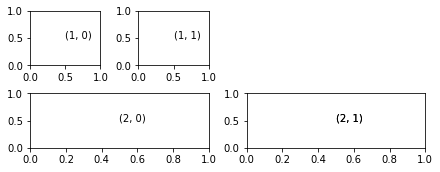

In [15]:

from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True)
depth=2
gs = GridSpec(4, 2**(depth+1), figure=fig)

axs = [gs[0, :]]
for child in cl:
    depth = child.depth
    rm = child.right_moves
    width = 2**(depth)
    print(width)
    axs.append(fig.add_subplot(gs[depth, width*rm:(width*rm+width)]))
    axs[-1].text(0.5,0.5,(depth, rm))
    

fig.suptitle("GridSpec")

plt.show()